# Lab 3

### Submission And Assignment Instructions
Submit your `Lab3_lastname_firstname.ipynb` file on canvas with your answers clearly marked (✅) and code commented. Skeleton code and/or comments are provided throughout to help you.

- ❓Questions you must answer or tasks are marked with a "❓"
- ✅ Answers you should give are marked with "✅ Answer:"
- *Helpful hints are usually given in italics*
- Code you need to write is marked with `##❓YOUR CODE HERE`
  - ⭐ Bonus questions are marked with a "⭐"
  - 🍓 Bonus answers are marked with a "🍓"

**Please don't erase ANY of these markings!** They're to help the TAs find your answers and code as much as they're to help you find the questions.

## Section 1: Proof of Non-negativity

❓Prove that non-negativity ($0 \leq D(\vec x, \vec y)$) follows from the three properties of a similarity metric. *You may do this math on paper and insert a picture of your work here.*

✅Answer:

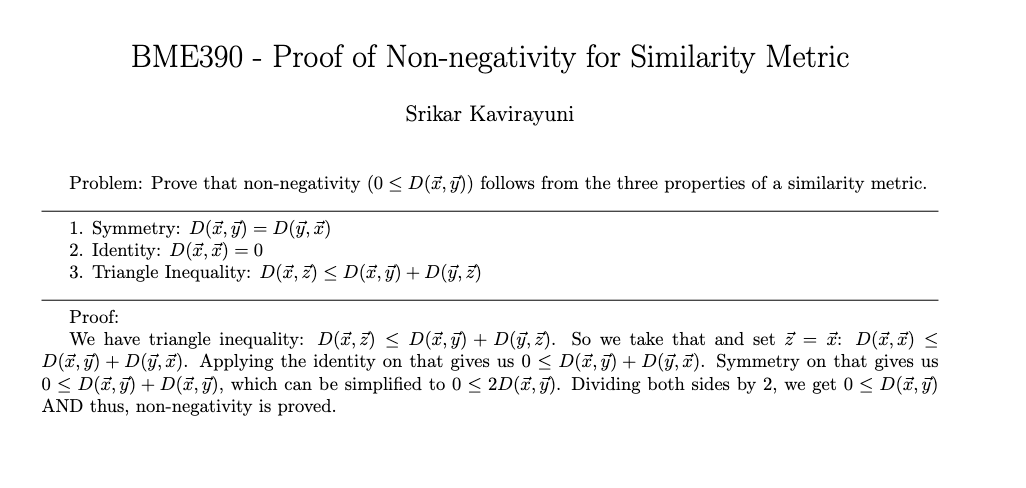

## Section 2: k-NN Visualizations with Toy Data

### 2.1: Visualizing Decision Boundaries
Run the code provided below to visualize the toy dataset and decision boundaries for several different distance metrics and values of $k$.

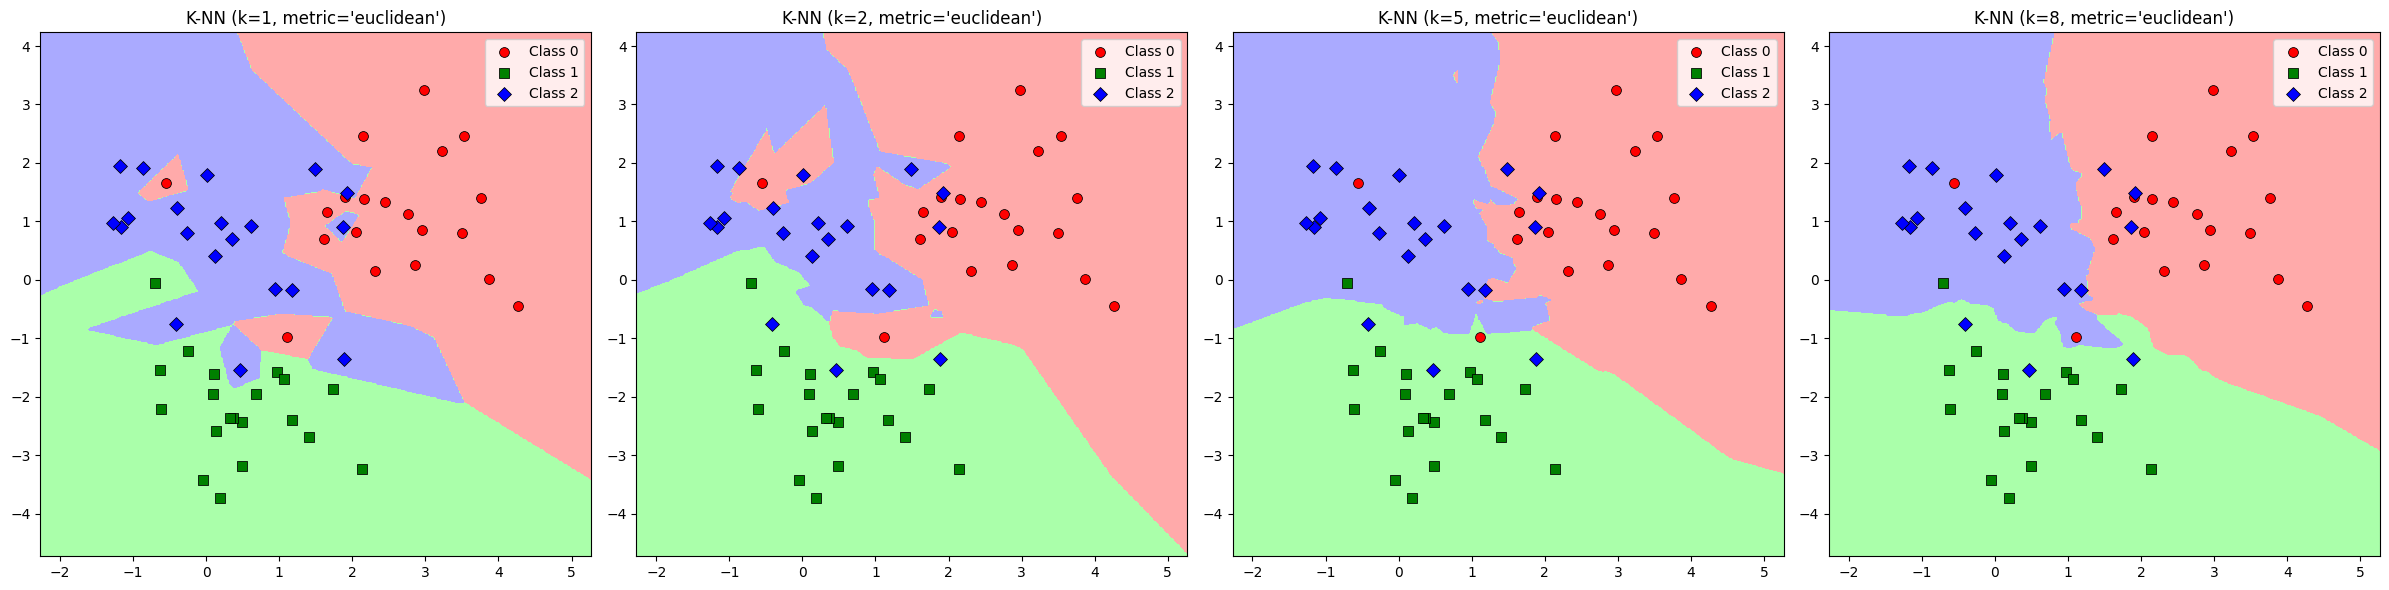

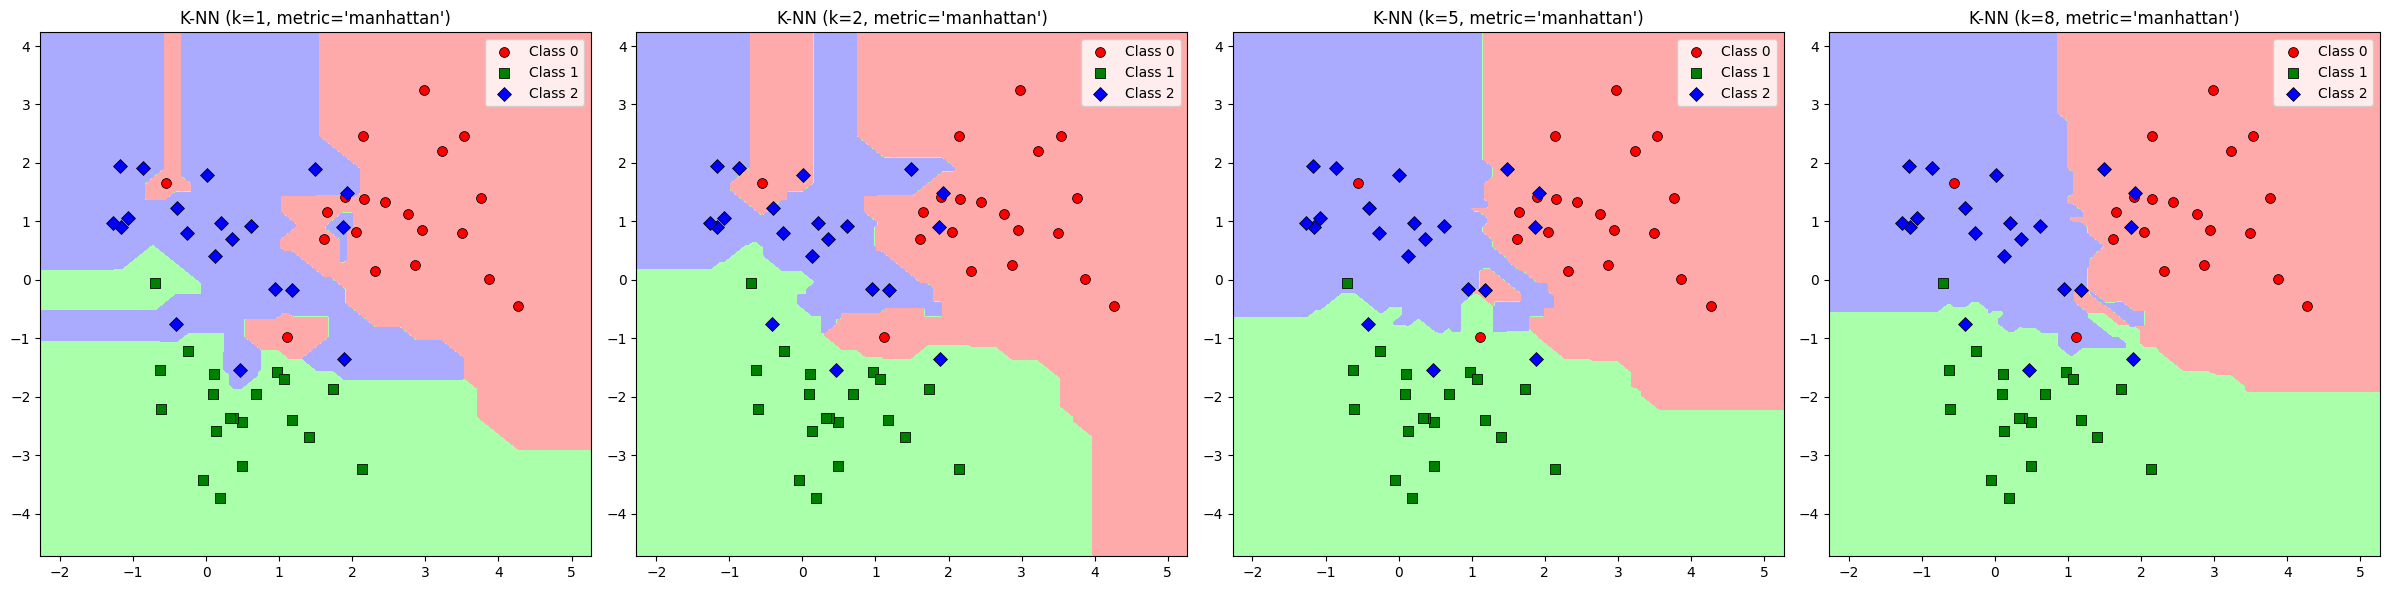

In [ ]:
## provided toy dataset code
# load necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Generate toy dataset, set seed to ensure reproducibility
np.random.seed(0)
n_points_per_class = 20

# create 3 overlapping classes of data
class1 = np.random.randn(n_points_per_class, 2) + [2, 1]
class2 = np.random.randn(n_points_per_class, 2) + [1, -2]
class3 = np.random.randn(n_points_per_class, 2) + [0, 0]

# combine these points into X and y datasets
X = np.vstack((class1, class2, class3))
y = np.array([0] * n_points_per_class + [1] * n_points_per_class + [2] * n_points_per_class)

# Plotting function to show decision boundaries
def plot_decision_boundaries(X, y, metric, ks):
    n_cols = len(ks)
    fig, axes = plt.subplots(1, n_cols, figsize=(n_cols * 6, 6))

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['red', 'green', 'blue']
    markers = ['o', 's', 'D']

    for ax, k in zip(axes, ks):
        clf = KNeighborsClassifier(n_neighbors=k, metric=metric)
        clf.fit(X, y)

        h = .02  # step size in the mesh (just for plotting decision boundaries)
        # prep plotting parameters for groups and decision boundaries
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        ## plotting the outputs
        ax.contourf(xx, yy, Z, cmap=cmap_light)
        for i, color, marker in zip(range(3), cmap_bold, markers):
            sns.scatterplot(ax=ax, x=X[y == i, 0], y=X[y == i, 1], marker=marker, color=color,
                            edgecolor='k', s=50, label=f'Class {i}')

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        # make sure to label the plot with the metric and value of k
        ax.set_title(f"K-NN (k={k}, metric='{metric}')")
        ax.legend()

    plt.tight_layout()
    plt.show()

# Choose distance metrics and vector of values of k to display
metrics = ['euclidean', 'manhattan']
ks = [1, 2, 5, 8]

# call function to plot decision boundaries for different metrics and values of k side-by-side
for metric in metrics:
    plot_decision_boundaries(X, y, metric, ks)

❓2.1.1 Briefly describe similarities and differences between the different values of $k$ in the plots above. How do the decision boundaries change with different values of $k$? Based on your knowledge of how the data were generated in the code above, are particular values of $k$ more or less accurate classifiers?

✅ Answer:

Across all plots, we can observe a consistent overall structure: Class 0 (red) dominates the upper right region, Class 1 (green) the lower left, and Class 2 (blue) occupies the central area. However, as k increases, we notice a significant change in the decision boundaries. With k=1, these boundaries appear very jagged and closely follow individual data points, potentially overfitting to noise. As k grows, the boundaries become progressively smoother and less complex, reflecting the algorithm's tendency to average over more neighbors. This smoothing effect is particularly evident with k=5 and k=8.

conclusion: smaller values of k are more accurate.

❓2.1.2 Based on the way these data were generated in the code above, are there particular classes of data that should be more or less difficult to separate from the other(s)? Do you see that reflected in the plots and decision boundaries?

✅ Answer:

The data generation method used in this experiment creates an inherent classification challenge, particularly for Class 2. By positioning Class 2's center at the origin [0, 0], it's situated in close proximity to both Class 1 (centered at [1, -2]) and Class 0 (centered at [2, 1]). This strategic placement results in big overlap of Class 2 data points with those of the other classes.
Examining the visualizations, we can observe the implications of this data distribution. The blue points representing Class 2 frequently appear interspersed within areas predominantly occupied by Class 0 (red) and Class 1 (green). This dispersal pattern leads to complex and somewhat erratic decision boundaries surrounding Class 2.
In contrast, the separation between Classes 0 and 1 is more pronounced. Their respective data points cluster more cohesively, leading to cleaner and more distinct decision boundaries between these two classes. This clearer delineation stands in stark contrast to the fuzzy, irregular borders that characterize the regions where Class 2 interfaces with the other classes.

❓2.1.3 Using the same data and the same values of k, run the k-NN algorithm again using a cosine distance metric. *Hint: You should just have to call the `plot_decision_boundaries` function written above with slightly different parameters.*

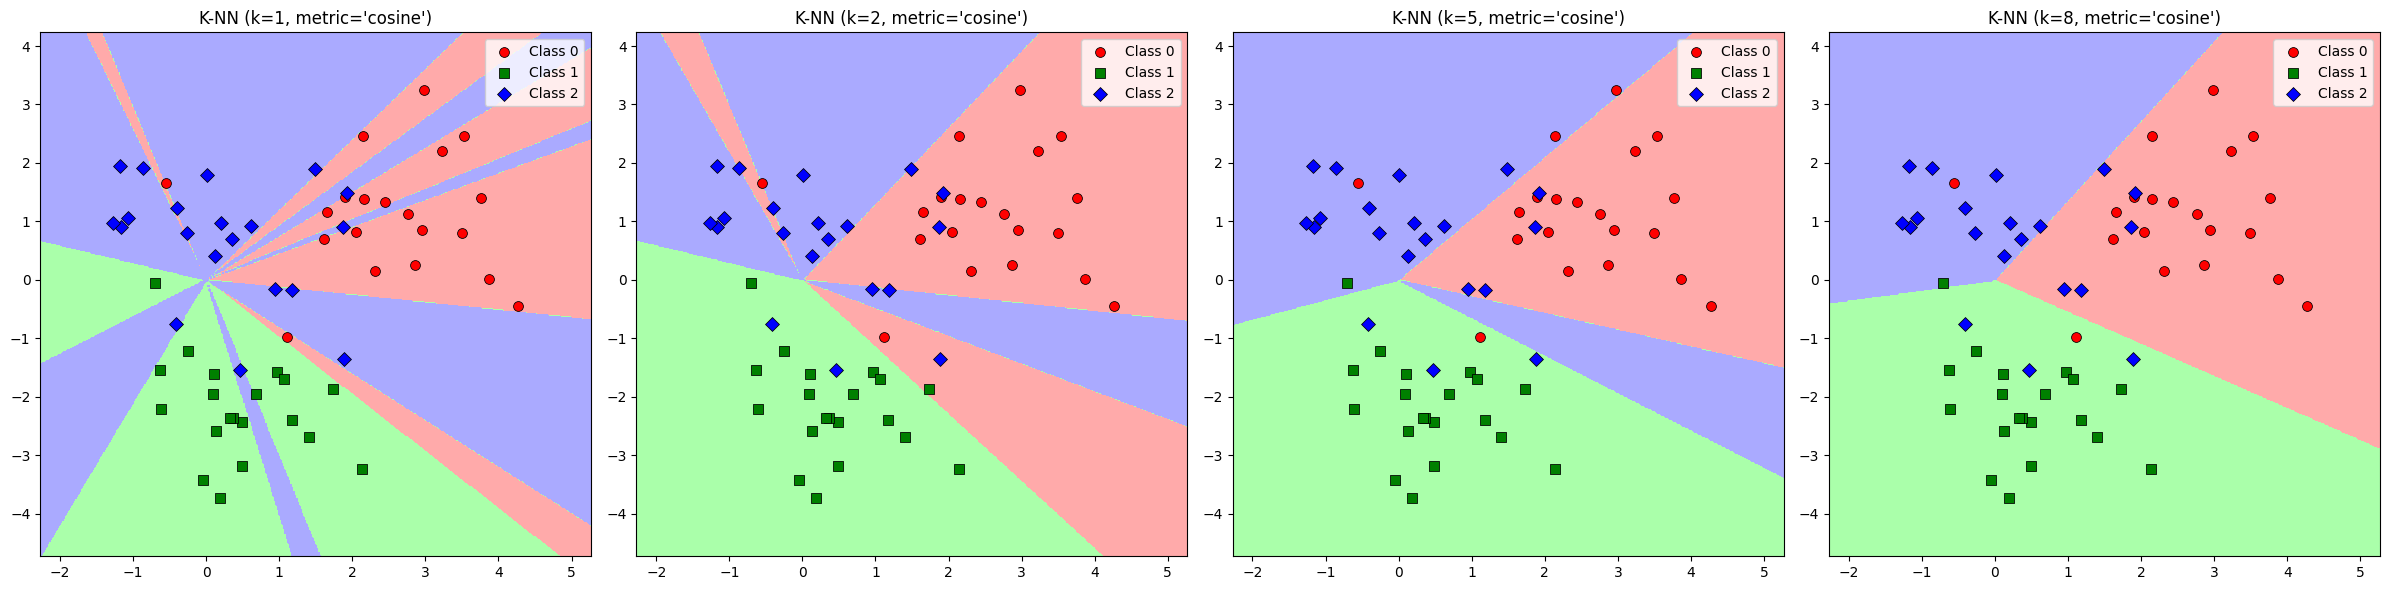

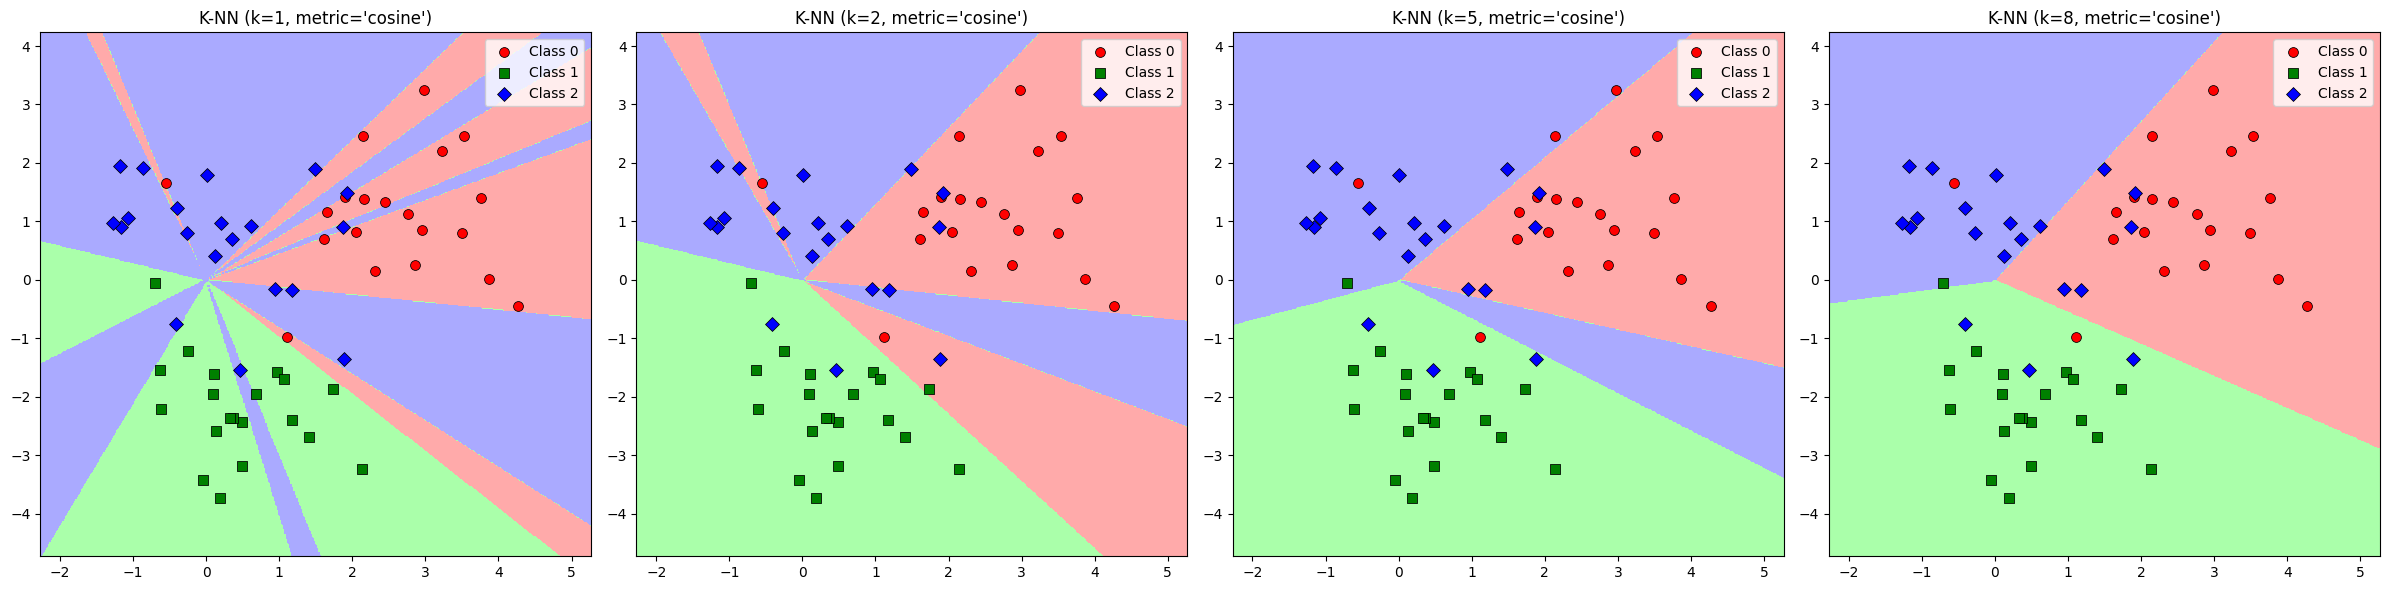

In [ ]:
##❓YOUR CODE HERE
for metric in metrics:
    plot_decision_boundaries(X, y, "cosine", ks)

❓2.1.4 Cosine similarity can be thought to measure "directionality" of the data. What kind of errors occur for this data and cosine distance? Based on how the data was generated, why is this the case?

✅Answer:

The cosine similarity metric, when applied to this dataset, reveals some interesting classification behaviors that stem from its focus on directionality rather than magnitude. Looking at the plots, we can observe that the decision boundaries form radial patterns emanating from the origin. This leads to some counterintuitive classifications, particularly for points that are farther from the origin.
The key issue here relates to how cosine similarity measures the angle between vectors, disregarding their lengths. In the context of our dataset, this means that points along the same radial line from the origin are considered similar, even if they're actually quite distant from each other in Euclidean space.
This property of cosine similarity interacts uniquely with our data generation method. Recall that our classes were centered at different points: Class 0 at [2, 1], Class 1 at [1, -2], and Class 2 at [0, 0]. The cosine metric essentially projects these centroids onto a unit circle, focusing solely on their angular separation. This can lead to misclassifications, especially for data points that are far from their class centers but happen to align directionally with a different class's centroid.
For instance, we might see some Class 0 points in the far upper-right quadrant being incorrectly classified as Class 1 or 2, simply because they share a similar angle from the origin. Similarly, some distant Class 1 points in the lower-left might be misclassified as Class 2.

### 2.2: Splits & Cross-validation - choosing the best value of k

❓2.2.1 Choose an appropriate distance metric (*hint: not cosine similarity*) and add onto the code below to rerun the exercise above with cross-validation and test the vector of ks (`ks`) provided. Report the accuracy for each value of $k$ you test and create a plot of cross-validation accuracy vs. k. Add error bars for standard error of the mean to the cross-validation accuracy plots.

> A commented framework is provided below. Code blocks you need to complete are marked with `##❓YOUR CODE HERE` at the top.



In [ ]:
## you don't need to modify this code block, just read it
## some newly necessary packages for cross-validation and error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score

# Generate toy dataset
np.random.seed(0)
n_points_per_class = 50

class1 = np.random.randn(n_points_per_class, 2) + [2, 1]
class2 = np.random.randn(n_points_per_class, 2) + [1, -2]
class3 = np.random.randn(n_points_per_class, 2) + [0, 0]

# combine these 3 classes of data together into one dataset and one set of class labels
X = np.vstack((class1, class2, class3))
y = np.array([0] * n_points_per_class + [1] * n_points_per_class + [2] * n_points_per_class)

# vector of k values to test with cross-validation
ks = range(1,31)

# make new plotting function to just deal with 1 value of k (no subplots of multiple values of k)
def plot_decision_boundaries_2(X, y, metric, k):
    fig, ax = plt.subplots(figsize=(6, 6))

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['red', 'green', 'blue']
    markers = ['o', 's', 'D']

    clf = KNeighborsClassifier(n_neighbors=k, metric=metric)
    clf.fit(X, y)

    h = .02  # step size in the mesh (just for plotting decision boundaries)
    # prep plotting parameters for groups and decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ## plotting the outputs
    ax.contourf(xx, yy, Z, cmap=cmap_light)
    for i, color, marker in zip(range(3), cmap_bold, markers):
        sns.scatterplot(ax=ax, x=X[y == i, 0], y=X[y == i, 1], marker=marker, color=color,
                        edgecolor='k', s=20, label=f'Class {i}')

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    # make sure to label the plot with the metric and value of k
    ax.set_title(f"K-NN (k={k}, metric='{metric}')")
    ax.legend()

    plt.tight_layout()
    plt.show()

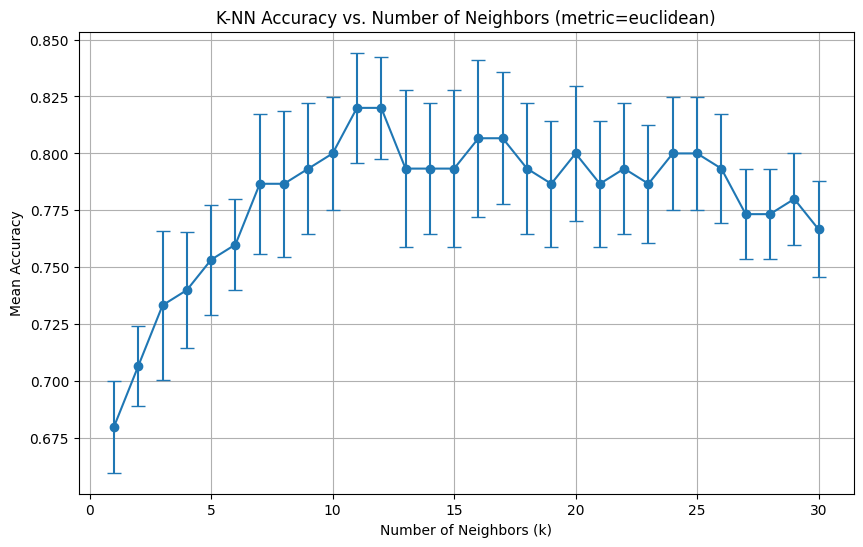

11
0.82


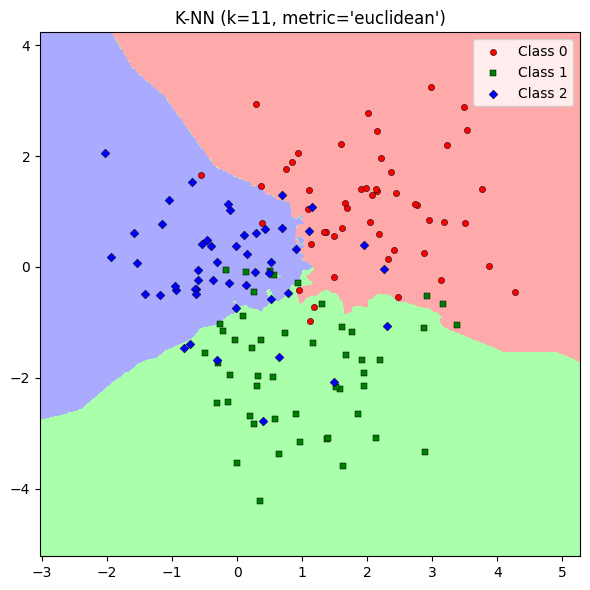

In [ ]:
##❓YOUR CODE HERE
def evaluate_knn(X, y, ks, metric):
  # Write a function to fit the K-NN classifier and evaluate accuracy using 5-fold cross-validation
  # use random_state = 12 for the cross-validation
  ##❓YOUR CODE HERE
  accuracy_scores = {}
  kf = KFold(n_splits=5, shuffle=True, random_state=12)  # 5-fold cross-validation

  ks = range(1,31) # range was given in above read-only example

  # loop through different values of k to run cross-validation on each
  for k in ks:
      clf = KNeighborsClassifier(n_neighbors=k, metric=metric)
      scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
      accuracy_scores[k] = scores

  # return classification accuracy scores from the cross-validation
  return accuracy_scores

# choose a distance metric
metric = "euclidean"
# apply the above function for your chosen distance metric
accuracy_scores = evaluate_knn(X, y, ks, metric)

# calculate mean and std error of accuracy across the 5 folds of cross-validation
mean_accuracies = [np.mean(accuracy_scores[k]) for k in ks]
sem_accuracies = [np.std(accuracy_scores[k]) for k in ks]/np.sqrt(5)

# Plot accuracy with error bars for each value of k
##❓YOUR CODE HERE
plt.figure(figsize=(10, 6))
plt.errorbar(ks, mean_accuracies, yerr=sem_accuracies, fmt='-o', capsize=5)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy')
plt.title(f'K-NN Accuracy vs. Number of Neighbors (metric={metric})')
plt.grid(True)
plt.show()

# find the best value of k and the corresponding accuracy
best_k = ks[np.argmax(mean_accuracies)]
best_accuracy = np.max(mean_accuracies)
# make sure to print out the best value of k and corresponding accuracy
print(best_k)
print(best_accuracy)

# Plot decision boundaries for the best value of k (not all values of k!)
# the function from above is sufficient for this
plot_decision_boundaries_2(X, y, metric, best_k)

❓2.2.2 What is the best value of k for these data? Based on the plots of average cross-validation accuracy across various values of k, recommend and defend a range of appropriate values of k.

✅ Answer:

 From the accuracy plot, we can see that the model's performance improves as we increase k from 1 to about 11, then it starts to get a bit wobbly.
The sweet spot appears to be around k=11, where we're hitting an accuracy of about 82%. This makes sense when we look at the decision boundary plot for k=11 - it shows a nice balance between fitting the data well and not getting too jagged or overfit. Now, we don't want to be too rigid here. While k=11 looks best, any value between 9 and 15 seems to give pretty solid results. This range gives us some flexibility without sacrificing too much accuracy. It's like finding the right porridge temperature in Goldilocks - not too hot, not too cold.
Why this range? Well, when k is too small (like 1 or 2), we're essentially just memorizing the training data, which isn't great for new, unseen data. On the flip side, if k gets too big (say, above 20), we start to lose the local patterns in our data, and everything becomes a bit too averaged out.
So, by sticking to this 9-15 range, we're striking a good balance. We're capturing enough local information to make good predictions, but we're also smoothing out some of the noise in the data. It's a classic trade-off in machine learning - we want to fit the data well, but not so well that we can't generalize to new examples.

## Section 3: tSNE! (PBMCs)

### 3.1: Load the Data and Manipulate

❓3.1.1 Load the provided file of scRNA-seq data as a pandas dataframe. Visualize just the first few rows and *and only the first few columns* of the data -- as described in the background document, there are thousands of cells (columns) in this dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# load local file "data_03_pbmcs.txt"
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data_03_pbmc.txt to data_03_pbmc.txt
User uploaded file "data_03_pbmc.txt" with length 16414799 bytes


In [ ]:
##❓YOUR CODE HERE
# load the pbmc data as a pandas df
pbmc_df = pd.read_table("data_03_pbmc.txt")
# Look at the top of the data
# be careful to just look at the first few rows AND only the first few columns
pbmc_df.head(10).iloc[:, :5]

,AAACATACAACCAC-1,AAACATTGAGCTAC-1,AAACATTGATCAGC-1,AAACCGTGCTTCCG-1,AAACCGTGTATGCG-1
PPBP,0.000000,0.000000,0.000000,1.566387,0.000000
LYZ,1.635873,1.962726,1.995416,4.521175,0.000000
S100A9,0.000000,0.000000,0.000000,3.838845,0.000000
IGLL5,0.000000,0.000000,0.000000,0.000000,0.000000
GNLY,0.000000,0.000000,1.429744,0.000000,3.453545
FTL,3.924095,3.063189,3.274161,5.692271,5.218589
PF4,0.000000,0.000000,0.000000,0.000000,0.000000
FTH1,2.226555,3.574384,3.582238,5.919842,3.453545
GNG11,0.000000,0.000000,0.000000,0.000000,0.000000
S100A8,0.000000,0.000000,0.000000,2.515108,0.000000


In [ ]:
pbmc_df.shape

(2000, 2638)

❓3.1.2 Transpose your loaded pandas df to make the observations (cells) into rows to make it compatible with `scikitlearn`.

In [ ]:
##❓YOUR CODE HERE
# transpose the pbmc df
pdft = pbmc_df.T
# check that it's the size/shape you expect
pdft.shape

(2638, 2000)

### 3.2: Make a t-SNE Plot

❓3.2.1 Use scikitlearn to make a t-SNE embeddings of these PBMCs.

In [ ]:
from sklearn.manifold import TSNE
##❓YOUR CODE HERE
# make and display a t-SNE in 2 dimensions
# Create a t-SNE model in 2-D and fit it to the data
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(pdft.values)

❓3.2.2 Plot your embeddings! Since there are a lot of cells that will pile up on top of each other, be sure to adjust `alpha` to make the points a bit transparent and avoid overplotting.

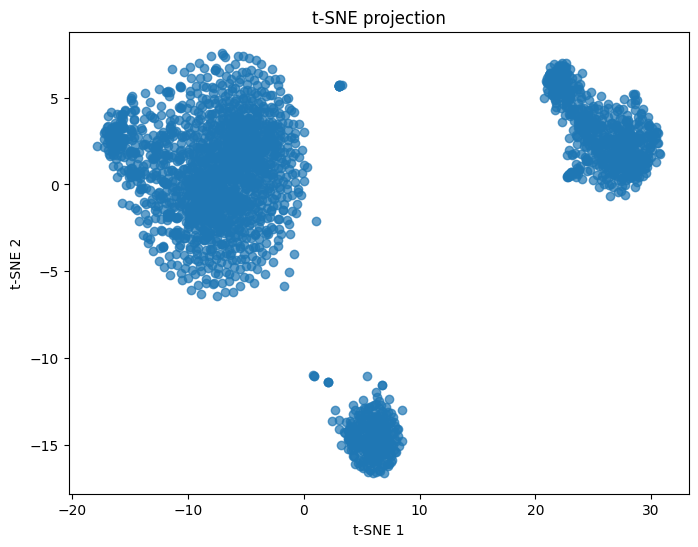

In [ ]:
##❓YOUR CODE HERE
# Plot the t-SNE embedding
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.7)
plt.title('t-SNE projection')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

### 3.3: Color the t-SNE Plot by Marker Gene Expressions

❓3.3.1 Remake the plot you made above, but color it by the expression (counts) of the marker genes on the list below (making 4 plots). Make sure to add a colorbar to each to understand the scale. Skeleton code is provided.


Marker genes:
- MS4A1
- PPBP
- LYZ
- CD74

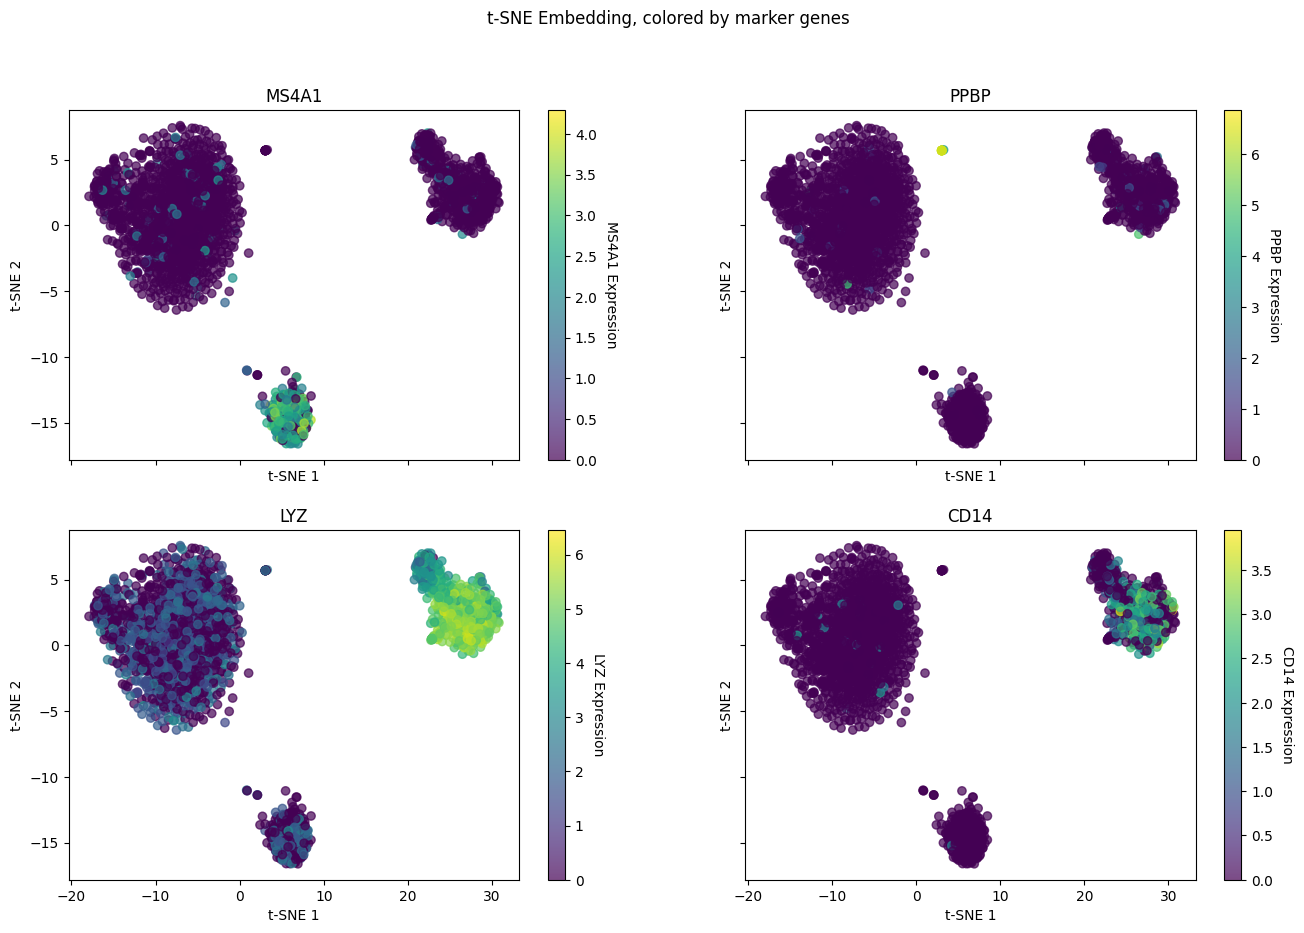

In [ ]:
##❓YOUR CODE HERE
# make the plot above, but colored by the marker genes
# remember to add a color bar for scale
# label the plots with the gene name

# Suggested skeleton for using map() for this task
 #(not necessary to use the skeleton, but it has helpful reminders)
# make a list of marker genes you'd like to plot
markers = ["MS4A1", "PPBP", "LYZ","CD14"]

# set up figure for plotting with subplots
fig, ax = plt.subplots(2,2, sharex = True, sharey=True, figsize=(16,10))
fig.suptitle('t-SNE Embedding, colored by marker genes')
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]

# write a function to put the marker gene into the appropriate subplot
def plot_my_gene(marker_gene,axis):
  ##❓YOUR CODE HERE
  gene_expression = pdft[marker_gene].values  # get gene expression for each gene
  sc = axis.scatter(tsne_result[:, 0], tsne_result[:, 1], c=gene_expression, cmap='viridis', alpha=0.7)

  # remember to add a colorbar
  cbar = plt.colorbar(sc, ax=axis)
  cbar.set_label(f'{marker_gene} Expression', rotation=270, labelpad=15)

  # remember to label each plot
  axis.set_title(marker_gene)
  axis.set_xlabel('t-SNE 1')
  axis.set_ylabel('t-SNE 2')


# map the function across the list of marker genes and subplots
list(map(plot_my_gene, markers, axes))
# display the full figure
fig.show()

❓3.3.2 Looking at the plots above, **do you think the marker gene(s) do a good job differentiating the various celltypes present in this dataset? In particular, what is the PPBP plot showing?** Assume here that "cell type" refers to cells that are neighbors - we expect some transcriptional variation within a cell type, but cells within a particular cell type are generally similar and are neighbors in high-dimensional transcriptional "space."

*Please only give a couple sentences description as a brief answer.*

✅ Answer:
The marker genes shown in these t-SNE plots generally do a good job differentiating cell types, as we can see distinct clusters with varying expression levels for MS4A1, LYZ, and CD14. However, the PPBP plot stands out as it shows high expression primarily in a small, isolated cluster. This suggests PPBP is a highly specific marker for a rare cell type in this dataset, likely representing a distinct and uncommon cell population compared to the more broadly expressed markers.

### 3.4: Color tSNE by external labels
❓3.4.1 Run the codeblock below to load in the celltype labels, which are in the same order as the original columns of the PBMC dataframe. Plot your tSNE embeddings colored by the provided celltype labels.

In [ ]:
# Load the celltype labels as a pd df
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

pbmc_idents = pd.read_csv("data_04_pbmcidents.txt", header=0, sep = "\t", quotechar = '"', quoting = 0)
# check that we've got labels! (just have a look at the data)
pbmc_idents.head(10)

Saving data_04_pbmcidents.txt to data_04_pbmcidents.txt
User uploaded file "data_04_pbmcidents.txt" with length 81473 bytes


,ident
AAACATACAACCAC-1,Memory.CD4
AAACATTGAGCTAC-1,B
AAACATTGATCAGC-1,Memory.CD4
AAACCGTGCTTCCG-1,CD14.Mono
AAACCGTGTATGCG-1,NK
AAACGCACTGGTAC-1,Memory.CD4
AAACGCTGACCAGT-1,CD8.T
AAACGCTGGTTCTT-1,CD8.T
AAACGCTGTAGCCA-1,Naive.CD4.T
AAACGCTGTTTCTG-1,FCGR3A.Mono


In [ ]:
print(f"Length of tsne_result: {tsne_result.shape[0]}")
print(f"Length of pbmc_idents: {pbmc_idents.shape[0]}")

Length of tsne_result: 2638
Length of pbmc_idents: 2638


In [ ]:
# import seaborn to make plotting easier with labels
import seaborn as sns
##❓YOUR CODE HERE
# first combine the tsne embeddings with the labels into 1 df
tsne_df = pd.DataFrame(tsne_result, columns=["tSNE1", "tSNE2"])
tsne_df['ident'] = pbmc_idents['ident'].values
tsne_df.head()

,tSNE1,tSNE2,ident
0,-3.857814,-2.445879,Memory.CD4
1,4.282433,-14.497439,B
2,-8.509079,-0.669504,Memory.CD4
3,23.943558,4.923555,CD14.Mono
4,-12.506413,5.515994,NK


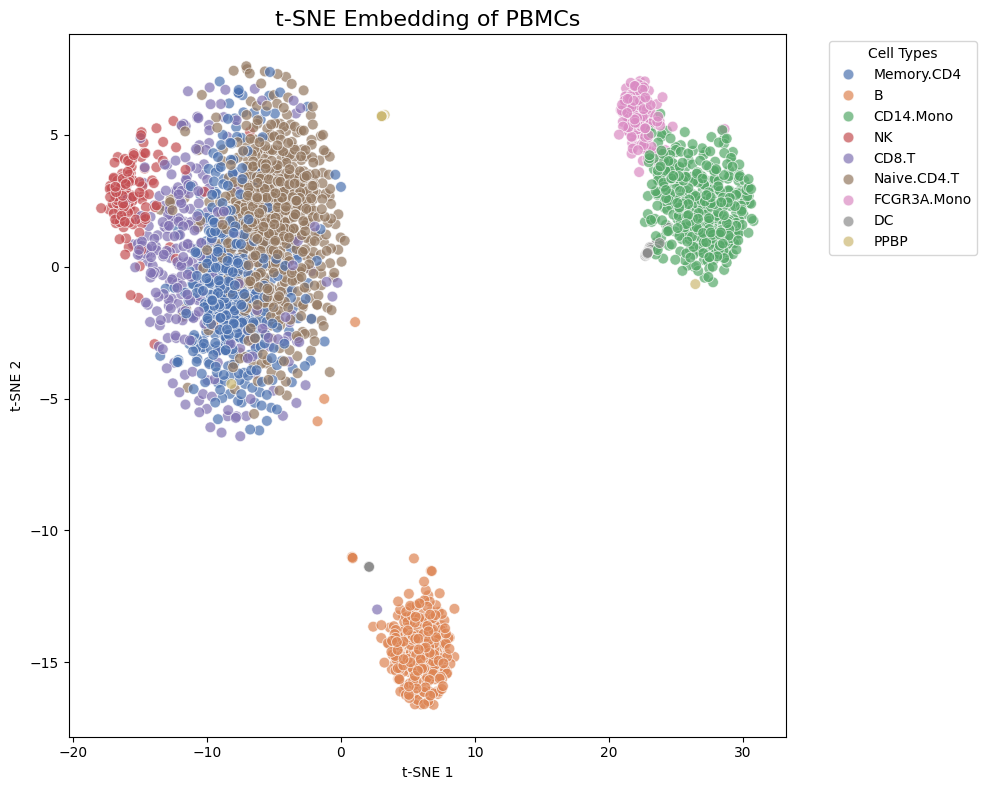

In [ ]:
# use seaborn to plot nicely and generate automatic labels of your celltypes
plt.figure(figsize=(10, 8))
sns.scatterplot(x="tSNE1", y="tSNE2", hue="ident", data=tsne_df, palette="deep", s=60, alpha=0.7)
plt.title('t-SNE Embedding of PBMCs', fontsize=16)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Cell Types', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## ⭐ Bonus - Section 4: A Return to kNN - PBMCs

Now we're going to try using k-NN to group the PBMC data and compare the classifications kNN produces to the t-SNE embedding.

⭐ 4.1 Apply 8-NN to the pbmc dataset, randomly splitting the cells into 80% training and 20% test sets. Then plot the test data's tSNE embeddings and color 2 ways: the true cell identities and the **8-NN** assignments.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Split the dataset into train and test sets
X = tsne_df[['tSNE1', 'tSNE2']].values
y = tsne_df['ident'].values

# recombine train and test to redo the t-SNE embeddings
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# redo the tsne embeddings
# tsne embeddings must be done all together
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
tsne = TSNE(n_components=2, random_state=42)
tsne_result_combined = tsne.fit_transform(X_combined)
tsne_df_combined = pd.DataFrame(tsne_result_combined, columns=["tSNE1", "tSNE2"])
tsne_df_combined['ident'] = y_combined
tsne_df_combined.head()

,tSNE1,tSNE2,ident
0,-15.477772,-2.882126,Memory.CD4
1,14.584272,55.113091,B
2,10.412710,65.112389,B
3,-12.687771,20.519278,Naive.CD4.T
4,-18.332912,-12.964678,Naive.CD4.T


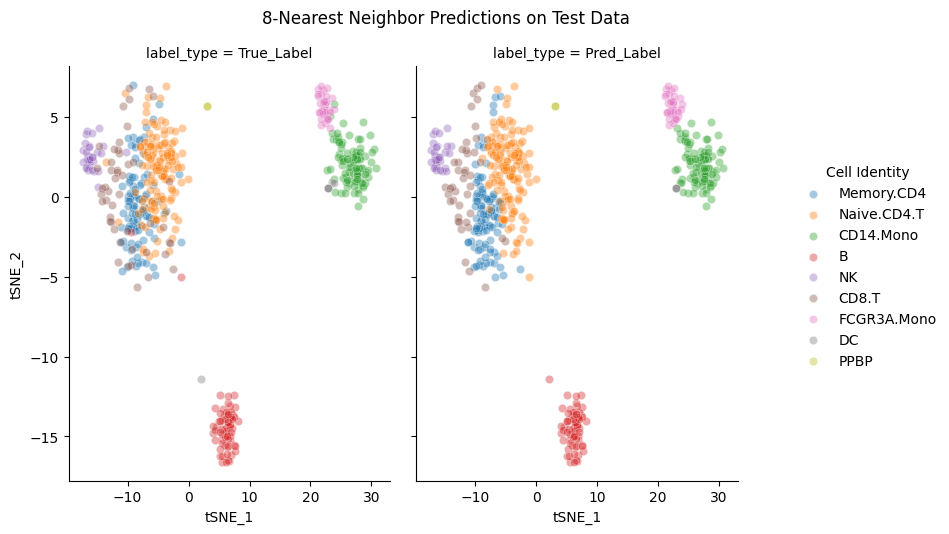

In [ ]:
##❓YOUR CODE HERE

# Create a KNN classifier with 8 neighbors
knn = KNeighborsClassifier(n_neighbors=8)

# fit the model on the training data
knn.fit(X_train, y_train)

# apply the model to make predictions on training and test data
y_pred = knn.predict(X_test)

# plot just the test data to visualize how well we did!
# make 2 subplots, one with the data colored by true identities
# the other colored by the predicted class labels
# however you plot, make sure to print a legend and appropriate titles
tsne_df_test = pd.DataFrame(X_test, columns=["tSNE1", "tSNE2"])
tsne_df_test['True_Label'] = y_test
tsne_df_test['Pred_Label'] = y_pred
tsne_df_test = pd.melt(tsne_df_test, id_vars=["tSNE1", "tSNE2"],
                       value_vars=["True_Label", "Pred_Label"],
                       var_name="label_type", value_name="identity")

# example to use seaborn to plot nicely and generate automatic labels of your celltypes
# change "tsne_df_test" to the appropriate pd dataframe
g = sns.FacetGrid(tsne_df_test, col="label_type", hue="identity")
g.map(sns.scatterplot, "tSNE1","tSNE2", alpha = 0.4)
g.set_axis_labels("tSNE_1","tSNE_2")
g.add_legend()
g.fig.suptitle("8-Nearest Neighbor Predictions on Test Data")
g.legend.set_title("Cell Identity")
g.figure.set_size_inches(10, 6)

⭐ 4.2 Report the model accuracy to give an idea of how this 8-NN model does overall. Because we have several different cell identities and the model does not appear to perform equally well across all identities, also use the [`classification_report` function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to give a more detailed breakdown across cell types.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, accuracy_score


##❓YOUR CODE HERE
# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)

# Suggestions for nice printing for TAs
print(f"Test accuracy: {test_accuracy:.2f}")


# print classification report
report = classification_report(y_test, y_pred, target_names=np.unique(y_test))
print("\nClassification Report:\n", report)

Test accuracy: 0.86

Classification Report:
               precision    recall  f1-score   support

           B       0.99      0.97      0.98        71
   CD14.Mono       0.97      0.98      0.98       100
       CD8.T       0.69      0.60      0.64        48
          DC       1.00      0.50      0.67         6
 FCGR3A.Mono       0.94      0.97      0.96        33
  Memory.CD4       0.73      0.75      0.74       101
          NK       0.94      0.94      0.94        32
 Naive.CD4.T       0.82      0.85      0.84       135
        PPBP       1.00      1.00      1.00         2

    accuracy                           0.86       528
   macro avg       0.90      0.84      0.86       528
weighted avg       0.86      0.86      0.86       528



⭐4.3 Look back at your graph above. Do the model assignments match the provided labels on the data in general?  Briefly describe visual differences between the predicted and given cell identity classes. Are there particular clusters on which the 8-NN model appears to do better or worse? Do the t-SNE embeddings help explain why the model succeeds and fails at identifying in particular cell types?

🍓Answer:
Looking at the t-SNE plots, we can see that the 8-NN model's predictions generally align well with the true labels, as evidenced by the similar cluster patterns in both plots. The model seems to perform exceptionally well on clearly distinct clusters, such as B cells, CD14 Monocytes, and NK cells, which appear as cohesive, well-separated groups in the t-SNE space. However, there are noticeable discrepancies in areas where different cell types overlap or are closely positioned, particularly between Memory CD4 and Naive CD4 T cells. This overlap in the t-SNE embedding helps explain why the model struggles more with these cell types - their transcriptional profiles are likely similar, making them harder to distinguish.